In [2]:
pip install pyod

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\rugge\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.8 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.8 kB 262.6 kB/s eta 0:00:01
     ----------------------------------- -- 153.6/165.8 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 165.8/165.8 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.7 MB 6.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.6/2.7 MB 6.8 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.7 MB 6.8 MB

In [4]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/199.4 MB 7.9 MB/s eta 0:00:26
   ---------------------------------------- 0.9/199.4 MB 10.9 MB/s eta 0:00:19
   ---------------------------------------- 1.5/199.4 MB 11.8 MB/s eta 0:00:17
   ---------------------------------------- 2.1/199.4 MB 12.1 MB/s eta 0:00:17
    --------------------------------------- 2.7/199.4 MB 12.3 MB/s eta 0:00:16
    --------------------------------------- 3.3/199.4 MB 12.6 MB/s eta 0:00:16
    --------------------------------------- 3.9/199.4 MB 12.6 MB/s eta 0:00:16
    --------------------------------------- 4.5/199.4 MB 12.6 MB/s eta 0:00:16
   - -------------------------------------- 5.2/199.4 MB 12.7 MB/s eta 0:00:16
   - -------------------------------------- 5.8/199.4 MB 12.7 MB/s eta 0:00:16
   - -------------------------------------- 6.4/199.4 MB 12.7 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\rugge\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pyod.models.hbos import HBOS
from pyod.models.loda import LODA
from pyod.models.lof import LOF
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pyod.models.iforest import IsolationForest
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting module
from sklearn.decomposition import PCA
from pyod.models.dif import DIF


In [7]:
df = pd.read_csv(r"df_tracks_completed.csv")

# HBOS: Histogram-based Outlier Score

In [8]:
# Remove not suitable features for outlier detection
df2 = df.drop(['id', 'name', 'explicit', 'artists', 'album_type', 'album_name', 'album_release_date', 'genre', 'other_artists_id', 'primary_artist_id', 'other_artists_popularity'], axis=1)

In [9]:
# Standardize values 
X_unscaled = df2.values
scaler = StandardScaler()
X = scaler.fit_transform(X_unscaled)

In [83]:
# contamination choices explained in the report
clf = HBOS(contamination=0.01, n_bins = 17)
clf.fit(X)

HBOS(alpha=0.1, contamination=0.01, n_bins=17, tol=0.5)

In [84]:
clf.decision_scores_

array([21.73879505, 17.96635357, 17.56314759, ..., 17.21552206,
       10.00310131, 12.11679655])

In [85]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88314,   893], dtype=int64))

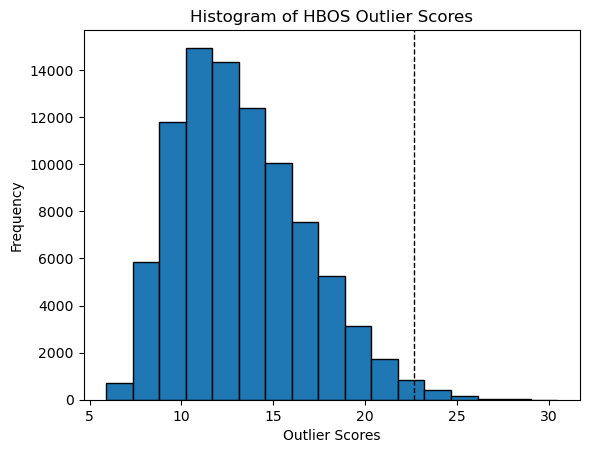

In [86]:
plt.hist(clf.decision_scores_, bins=17, edgecolor='black')
plt.axvline(np.min(clf.decision_scores_[outliers == 1]), color='k', linestyle='dashed', linewidth=1)

# Adding title and axis labels
plt.title('Histogram of HBOS Outlier Scores')
plt.xlabel('Outlier Scores')
plt.ylabel('Frequency')

plt.show()

In [ ]:
### Increase bins number
clf = HBOS(contamination=0.01, n_bins = 20)
clf.fit(X)

In [89]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88314,   893], dtype=int64))

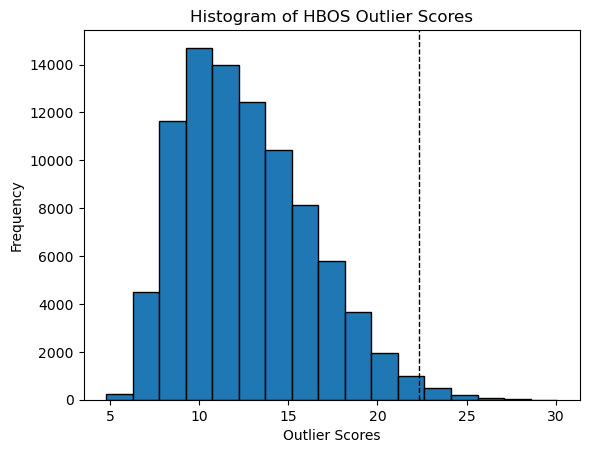

In [90]:
plt.hist(clf.decision_scores_, bins=17, edgecolor='black')
plt.axvline(np.min(clf.decision_scores_[outliers == 1]), color='k', linestyle='dashed', linewidth=1)

# Adding title and axis labels
plt.title('Histogram of HBOS Outlier Scores')
plt.xlabel('Outlier Scores')
plt.ylabel('Frequency')

plt.show()

In [91]:
### Still not clear-cut, increase more
clf = HBOS(contamination=0.01, n_bins = 30)
clf.fit(X)

HBOS(alpha=0.1, contamination=0.01, n_bins=30, tol=0.5)

In [92]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88314,   893], dtype=int64))

In [98]:
clf.decision_scores_

array([ 4.45931038,  1.95528507,  2.74746434, ...,  1.16291479,
       -1.82176661, -0.63809656])

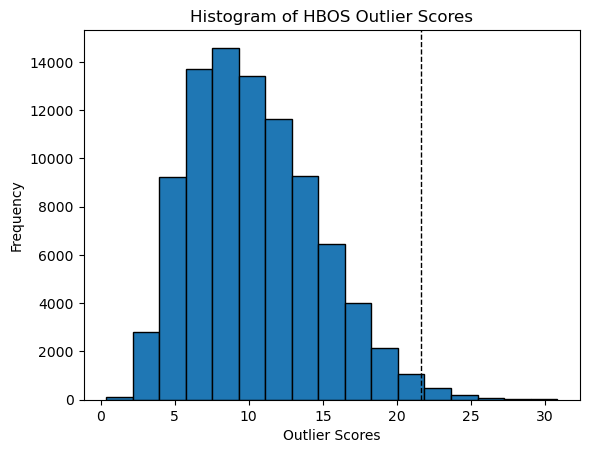

In [93]:
plt.hist(clf.decision_scores_, bins=17, edgecolor='black')
plt.axvline(np.min(clf.decision_scores_[outliers == 1]), color='k', linestyle='dashed', linewidth=1)

# Adding title and axis labels
plt.title('Histogram of HBOS Outlier Scores')
plt.xlabel('Outlier Scores')
plt.ylabel('Frequency')

plt.show()

# Decent configuration

In [ ]:
# Add boolean (1: outlier 0: not outlier) in the df
df['hbos_outliers'] = outliers

# LODA: Lightweight on-line detector of anomalies

In [77]:
# Let's try with default random_cuts value of 100
clf = LODA(contamination=0.01, n_bins = 17)
clf.fit(X)

LODA(contamination=0.01, n_bins=17, n_random_cuts=100)

In [78]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88314,   893], dtype=int64))

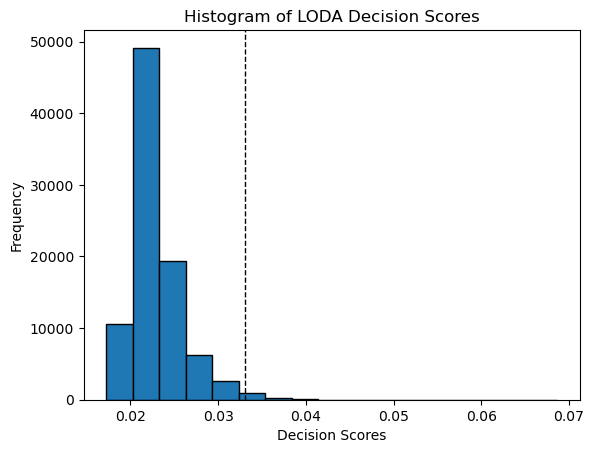

In [79]:
plt.hist(clf.decision_scores_, bins=17, edgecolor='black')
plt.axvline(np.min(clf.decision_scores_[np.where(outliers == 1)]), color='k', linestyle='dashed', linewidth=1)

# Adding title and axis labels
plt.title('Histogram of LODA Decision Scores')
plt.xlabel('Decision Scores')
plt.ylabel('Frequency')

plt.show()

In [68]:
### Random cuts = 250
clf = LODA(contamination=0.01, n_bins = 17, n_random_cuts = 250)
clf.fit(X)

LODA(contamination=0.01, n_bins=17, n_random_cuts=250)

In [69]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88314,   893], dtype=int64))

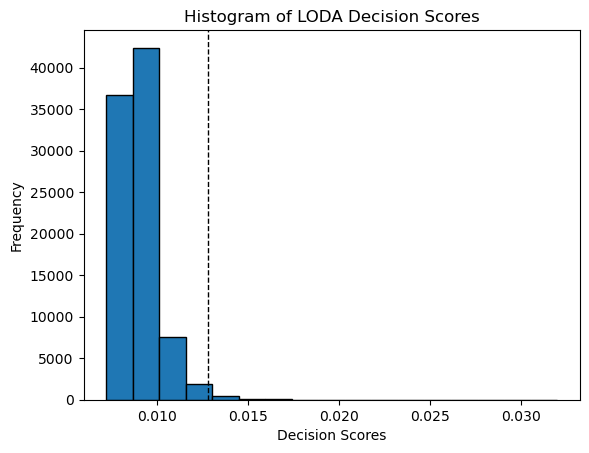

In [70]:
plt.hist(clf.decision_scores_, bins=17, edgecolor='black')
plt.axvline(np.min(clf.decision_scores_[np.where(outliers == 1)]), color='k', linestyle='dashed', linewidth=1)

# Adding title and axis labels
plt.title('Histogram of LODA Decision Scores')
plt.xlabel('Decision Scores')
plt.ylabel('Frequency')

plt.show()

In [169]:
### Random cuts = 75
clf = LODA(contamination=0.01, n_bins = 17, n_random_cuts = 75)
clf.fit(X)

LODA(contamination=0.01, n_bins=17, n_random_cuts=75)

In [170]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88314,   893], dtype=int64))

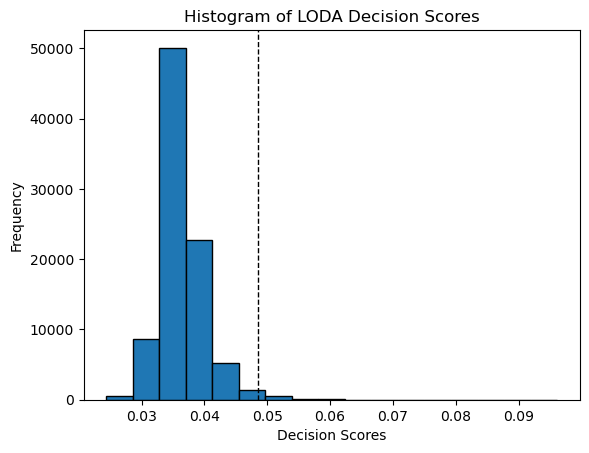

In [171]:
plt.hist(clf.decision_scores_, bins=17, edgecolor='black')
plt.axvline(np.min(clf.decision_scores_[np.where(outliers == 1)]), color='k', linestyle='dashed', linewidth=1)

# Adding title and axis labels
plt.title('Histogram of LODA Decision Scores')
plt.xlabel('Decision Scores')
plt.ylabel('Frequency')

plt.show()

## Visually that's good

In [ ]:
# Add boolean (1: outlier 0: not outlier) in the df
df['loda_outliers'] = outliers

#### Comparing HBOS and LODA outliers

In [174]:
hbos_outliers = df['hbos_outliers']
loda_outliers = df['loda_outliers']

# Find only outliers
hbos_outliers_binary = (hbos_outliers > 0).astype(int)
loda_outliers_binary = (loda_outliers > 0).astype(int)

# Calculate similarity metrics between HBOS and LODA outliers
accuracy = accuracy_score(hbos_outliers_binary, loda_outliers_binary)
precision = precision_score(hbos_outliers_binary, loda_outliers_binary)
recall = recall_score(hbos_outliers_binary, loda_outliers_binary)
f1 = f1_score(hbos_outliers_binary, loda_outliers_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9828264598069658
Precision: 0.1422172452407615
Recall: 0.1422172452407615
F1-score: 0.1422172452407615


In [176]:
# Find indices of matching 1s
matching_ones_indices = np.where((hbos_outliers_binary == 1) & (loda_outliers_binary == 1))[0]

print("Indices of matching 1s:", matching_ones_indices)

Indices of matching 1s: [ 1371  3724  7089  7158  7161  7295  7320  7330  7345  7359  7399  7530
  7553  7587  7598  7626  7665  7717  7746  7764  7786  7805  7813  7883
  7893  7946  7956  8009 13605 15193 15241 15639 15704 15718 15832 15954
 15974 16085 19642 19684 19689 19707 19715 19798 19811 19813 19843 19854
 19856 19888 19935 19940 19970 19975 19987 19992 20001 20011 20014 26203
 30418 30658 30660 30828 31423 37468 37491 37919 39654 39686 39880 39952
 44908 45437 55120 55146 55478 55811 60212 66359 66365 66391 66428 66558
 66560 66577 66595 66598 66599 66600 66617 66656 66659 66660 66665 66691
 66699 66700 66705 66708 66712 66720 66726 66728 66745 66841 66842 66846
 66851 66863 66915 66918 66945 66946 67084 67794 73204 73398 73463 73465
 73583 73624 73635 79862 79937 79945 85507]


In [178]:
# Find indices of matching 1s
matching_ones_indices = np.where((hbos_outliers_binary == 1) & (loda_outliers_binary == 1))[0]

# Count the number of matching 1s
matching_ones_count = len(matching_ones_indices)

matching_ones_count

## Only 127 out of 893 outliers matched; as explained in the report, we won't consider HBOS from now on

127

In [188]:
### Let's now find increase LODA contamination to 0.02 for further comparisons 
clf = LODA(contamination=0.02, n_bins = 17, n_random_cuts = 75)
clf.fit(X)

LODA(contamination=0.02, n_bins=17, n_random_cuts=75)

In [189]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([87422,  1785], dtype=int64))

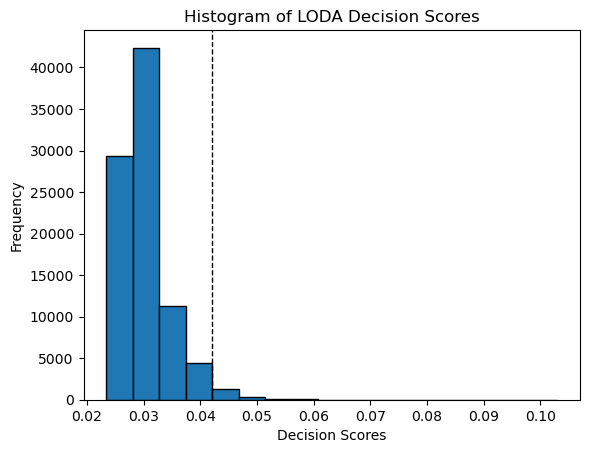

In [190]:
plt.hist(clf.decision_scores_, bins=17, edgecolor='black')
plt.axvline(np.min(clf.decision_scores_[np.where(outliers == 1)]), color='k', linestyle='dashed', linewidth=1)

# Adding title and axis labels
plt.title('Histogram of LODA Decision Scores')
plt.xlabel('Decision Scores')
plt.ylabel('Frequency')

plt.show()

In [191]:
# Replace feature values
df['loda_outliers'] = outliers

# LOF: Local Outlier Factor

In [12]:
clf = LOF(contamination=0.02, n_neighbors=20)
clf.fit(X)
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

'''
List of attempts with different k
- k=23 (array([0, 1]), array([88483,   737])
- k=23 (array([0, 1]), array([88483,   724])
- k=22 (array([0, 1]), array([88481,   726])
- k=21 (array([0, 1]), array([88493,   714])
- k=20 (array([0, 1]), array([88504,   703])
- k=16 (array([0, 1]), array([88570, 675])
- k=15 (array([0, 1]), array([88570, 643])
- k=14 (array([0, 1]), array([88570, 645])
- k=13 (array([0, 1]), array([88570, 637])
- k=12 (array([0, 1]), array([88562, 645])
- k=10 (array([0, 1]), array([88587,620])
- k=5 (array([0, 1]), array([88595,612]) 
- k=4 (array([0, 1]), array([88668,539])
- k=3 (array([0, 1]), array([88727,480])'''

'\nList of attempts with different k\n- k=23 (array([0, 1]), array([88483,   737])\n- k=23 (array([0, 1]), array([88483,   724])\n- k=22 (array([0, 1]), array([88481,   726])\n- k=21 (array([0, 1]), array([88493,   714])\n- k=20 (array([0, 1]), array([88504,   703])\n- k=16 (array([0, 1]), array([88570, 675])\n- k=15 (array([0, 1]), array([88570, 643])\n- k=14 (array([0, 1]), array([88570, 645])\n- k=13 (array([0, 1]), array([88570, 637])\n- k=12 (array([0, 1]), array([88562, 645])\n- k=10 (array([0, 1]), array([88587,620])\n- k=5 (array([0, 1]), array([88595,612]) \n- k=4 (array([0, 1]), array([88668,539])\n- k=3 (array([0, 1]), array([88727,480])'

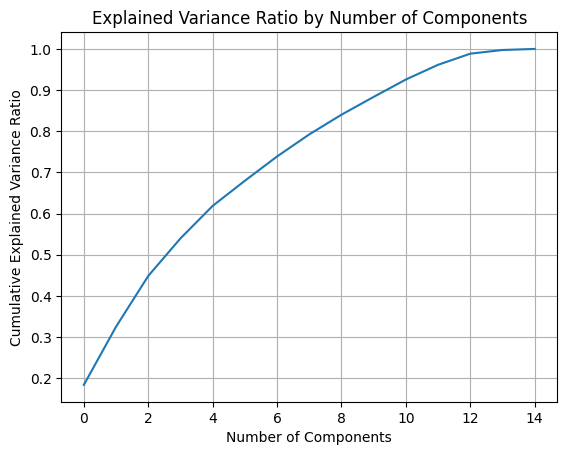

In [13]:
# Fit PCA with a range of components
pca = PCA()
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

In [14]:
pca = PCA(n_components=7)
X_reduced = pca.fit_transform(X)
pca_df = pd.DataFrame(X_reduced)

In [15]:
pca_df['outliers'] = outliers

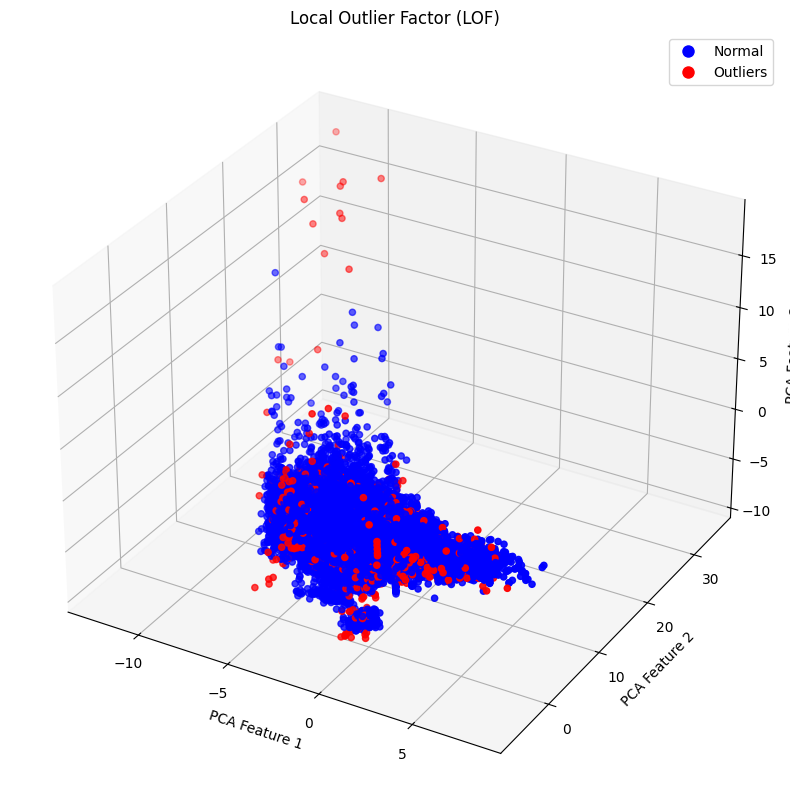

In [16]:
labels = pca_df['outliers']

# Create the 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data
scatter = ax.scatter(pca_df[0], pca_df[1], pca_df[2], c=labels, cmap='bwr', s=20)

# Set the title and labels
ax.set_title('Local Outlier Factor (LOF)')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')

# Create a legend
normal = plt.Line2D([0], [0], marker='o', color='w', label='Normal',
                    markerfacecolor='b', markersize=10)
outlier = plt.Line2D([0], [0], marker='o', color='w', label='Outliers',
                     markerfacecolor='r', markersize=10)
ax.legend(handles=[normal, outlier])

# Show the plot
plt.show()

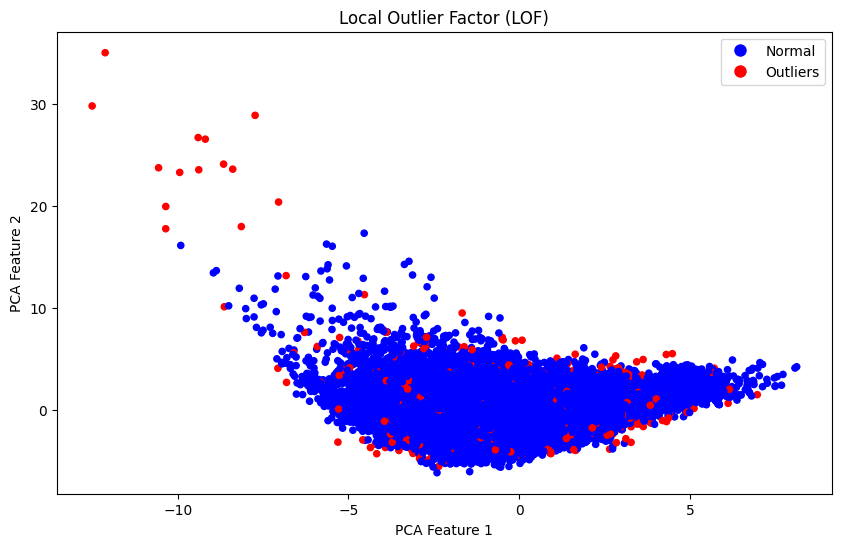

In [17]:
# Create the 2D scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.scatter(pca_df[0], pca_df[1], c=labels, cmap='bwr', s=20)

# Set the title and labels
plt.title('Local Outlier Factor (LOF)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# Create a legend
normal = plt.Line2D([0], [0], marker='o', color='w', label='Normal',
                    markerfacecolor='b', markersize=10)
outlier = plt.Line2D([0], [0], marker='o', color='w', label='Outliers',
                     markerfacecolor='r', markersize=10)
plt.legend(handles=[normal, outlier])

# Show the plot
plt.show()

# Isolation Forest

In [224]:
# Start from contamination = 0.02 
clf = IsolationForest(contamination = 0.02)
clf.fit(X)

IsolationForest(contamination=0.02)

In [225]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 1785, 87422], dtype=int64))

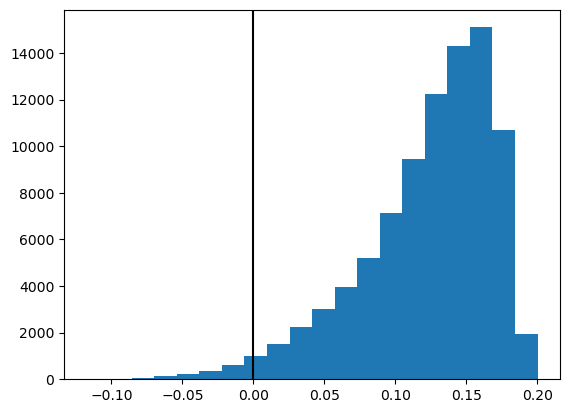

In [226]:
plt.hist(clf.decision_function(X), bins=20)
plt.axvline(np.min(clf.decision_function(X)[np.where(outliers==1)]), c='k')
plt.show()

In [227]:
df['isoforest_outliers'] = outliers

In [230]:
### Achieve consistency in our dataset

# Replace -1 with 1 and 1 with 0 in the 'isoforest' column
df['isoforest_outliers'] = df['isoforest_outliers'].replace({-1: 1, 1: 0})

#### Comparing Isolation Forest and LODA

In [374]:
isoforest_outliers = df['isoforest_outliers']
# loda_outliers = df['loda_outliers'] (already computed)

# Calculate similarity metrics
accuracy = accuracy_score(isoforest_outliers, loda_outliers)
precision = precision_score(isoforest_outliers, loda_outliers)
recall = recall_score(isoforest_outliers, loda_outliers)
f1 = f1_score(isoforest_outliers, loda_outliers)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9819945220241569
Precision: 0.5173444976076556
Recall: 0.5204572803850782
F1-score: 0.5188962207558488


In [473]:
# Find matching outliers
matching_indices = np.where((isoforest_outliers == 1) & (loda_outliers == 1))[0]

# Count matching outliers
matching_count = len(matching_indices)

In [474]:
matching_count

865

In [475]:
# Retrieve dataset with matching outliers
matching_dataset = df.iloc[matching_indices]


#### Visualizing the results with PCA 

C:\Users\rugge\anaconda3\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


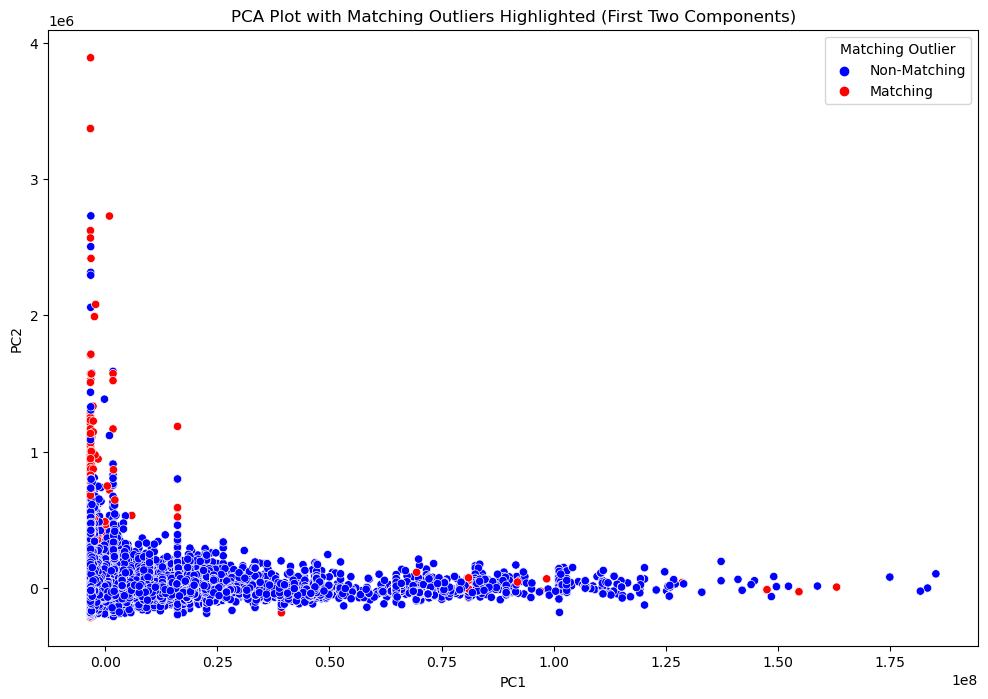

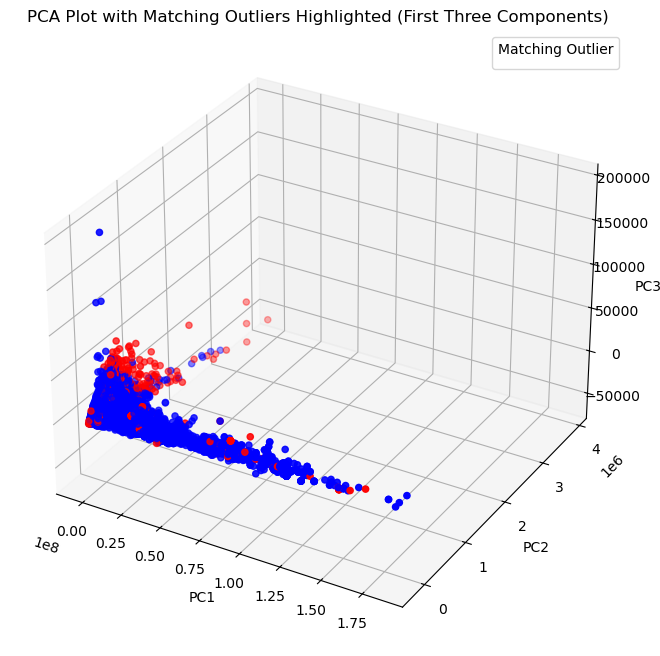

In [248]:
# Perform PCA
pca = PCA(n_components=3)  
pca_result = pca.fit_transform(df2)  # Using all "interesting" features

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])  

# Add a column indicating whether the point is a matching outlier or not
pca_df['Matching_Outlier'] = 'Non-Matching'
pca_df.loc[matching_indices, 'Matching_Outlier'] = 'Matching'

# Plot PCA with different colors for matching and non-matching outliers (2D)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Matching_Outlier', data=pca_df, palette=['blue', 'red'])
plt.title('PCA Plot with Matching Outliers Highlighted (First Two Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Matching Outlier', loc='upper right')

# Plot PCA with different colors for matching and non-matching outliers (3D)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Matching_Outlier'].map({'Non-Matching': 'blue', 'Matching': 'red'}))
ax.set_title('PCA Plot with Matching Outliers Highlighted (First Three Components)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(handles=scatter.legend_elements()[0], labels=['Non-Matching', 'Matching'], title='Matching Outlier', loc='upper right')
plt.show()


# Deep Isolation Forest

In [276]:
# default parameters and contamination = 0.02
clf = DIF(contamination = 0.02)
clf.fit(X)

DIF(batch_size=1000, contamination=0.02, device=device(type='cpu'),
  hidden_activation='tanh', hidden_neurons=[500, 100], max_samples=256,
  n_ensemble=50, n_estimators=6, random_state=None, representation_dim=20,
  skip_connection=False)

In [277]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

# only 123 outliers (with that contamination level LODA and IF found 1785)

(array([0, 1]), array([89084,   123], dtype=int64))

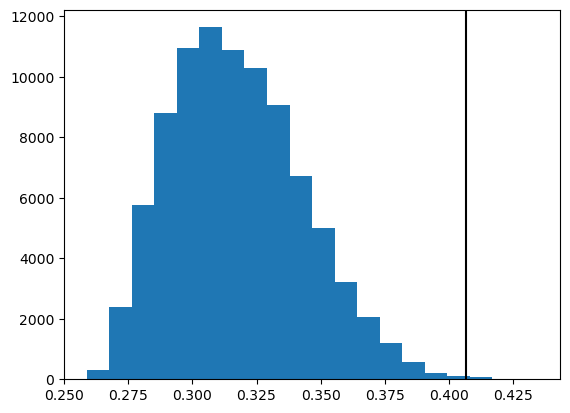

In [278]:
plt.hist(clf.decision_function(X), bins=20)
plt.axvline(np.min(clf.decision_function(X)[np.where(outliers==1)]), c='k')
plt.show()

In [279]:
df['deep_isoforest_outliers'] = outliers

In [ ]:
## Remove 113 outliers DIF outliers from the df 
df = df[df['deep_isoforest_outliers'] != 1]

#### Distribution of other outliers detected

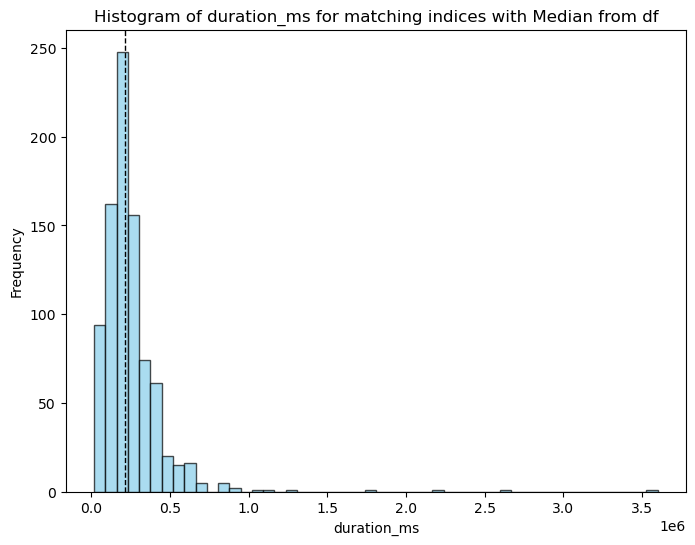

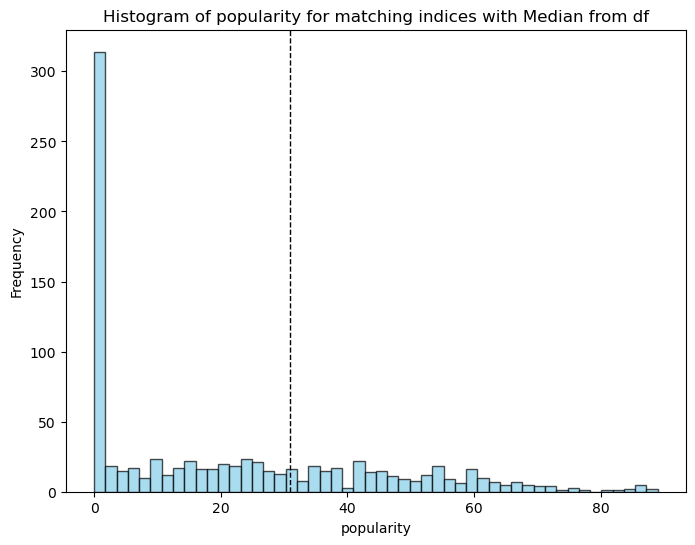

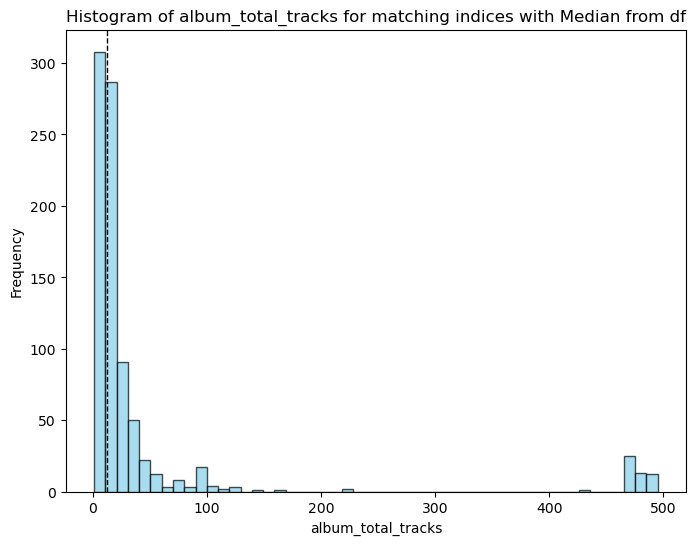

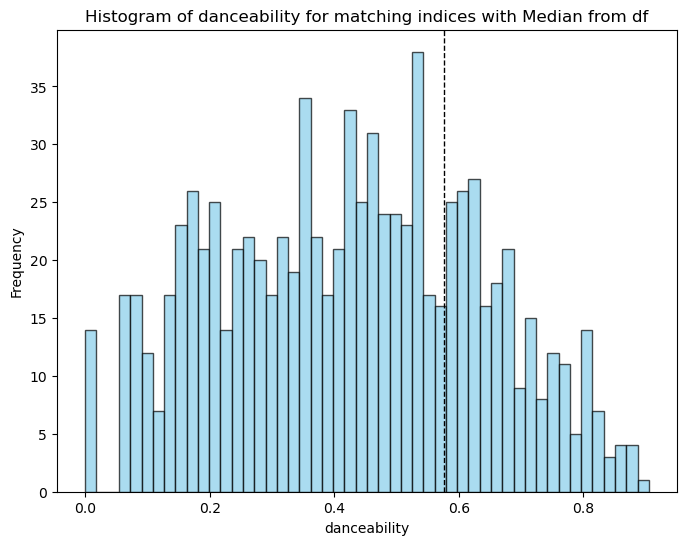

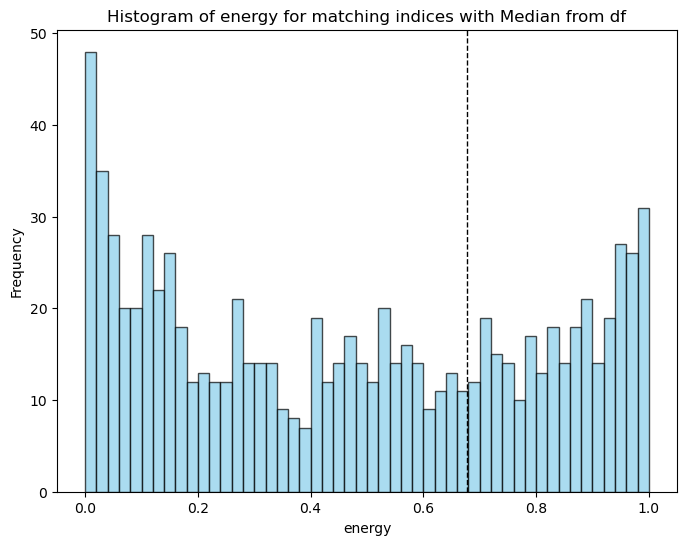

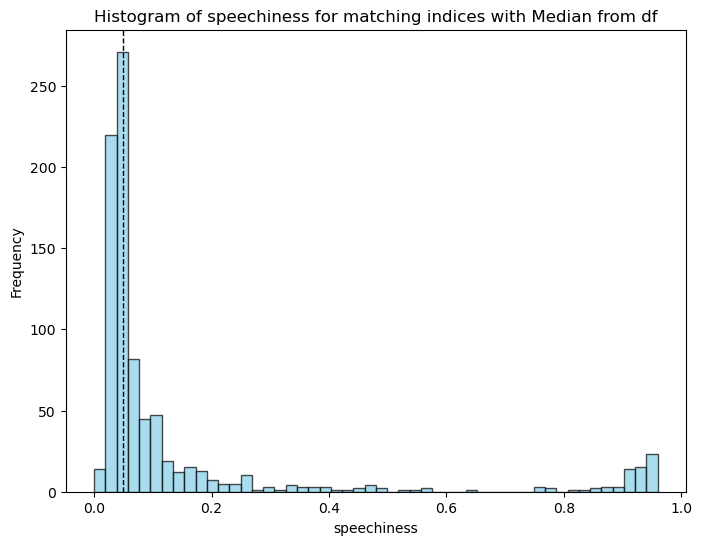

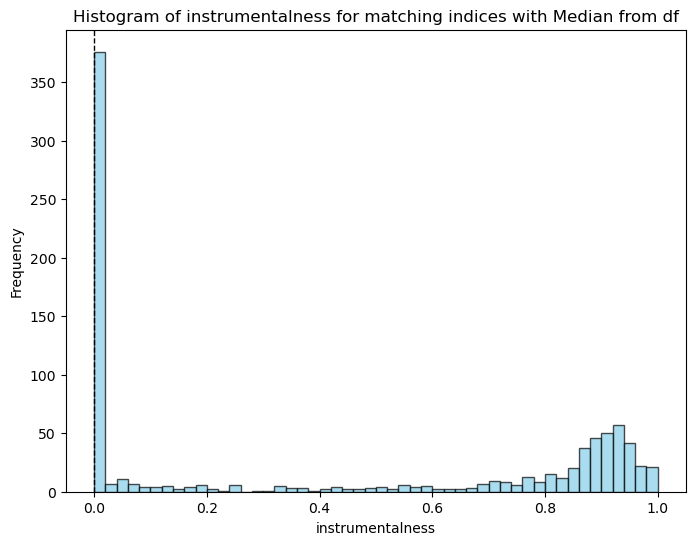

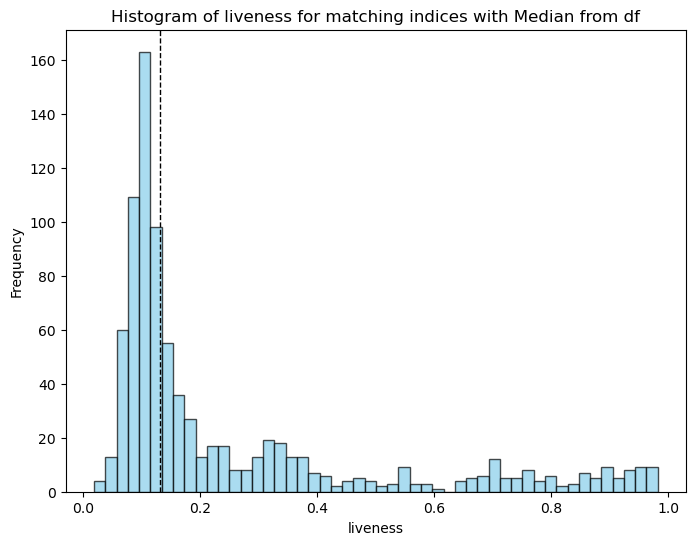

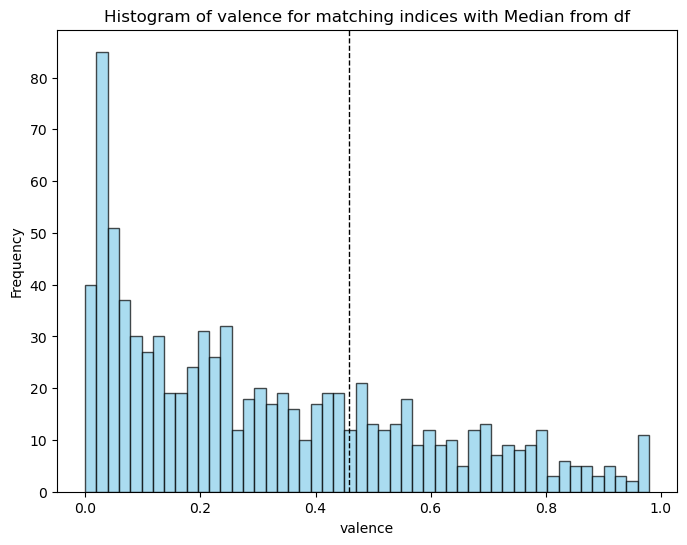

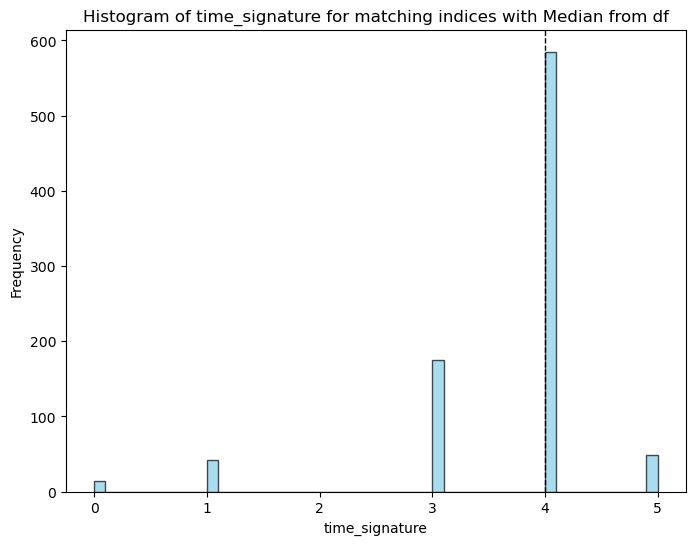

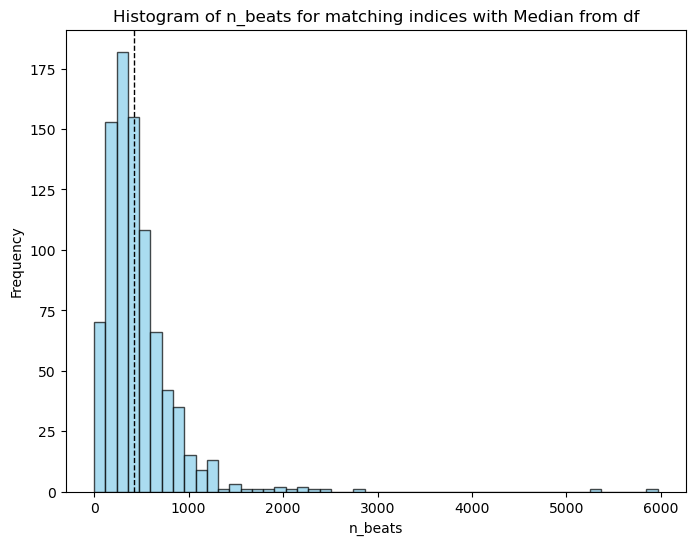

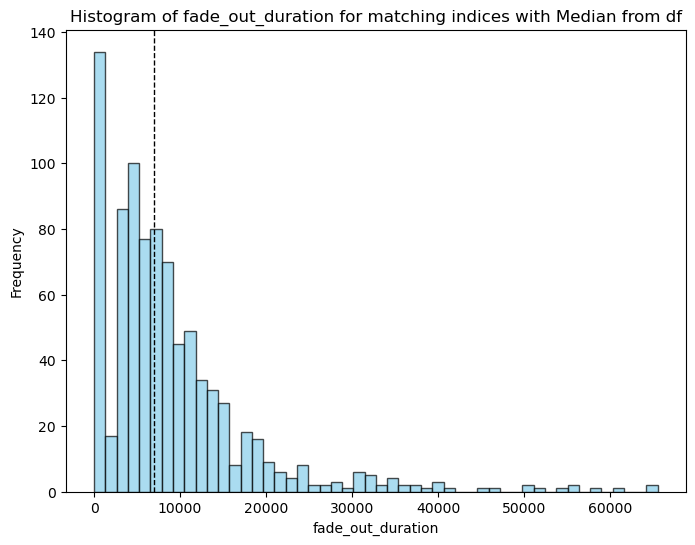

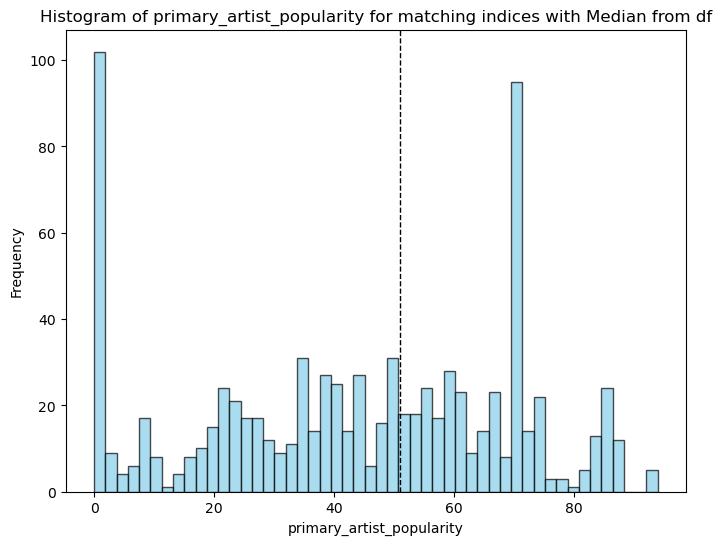

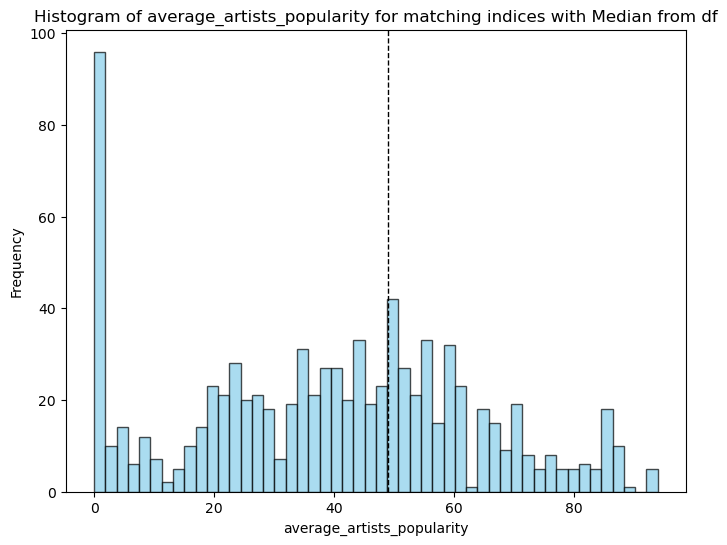

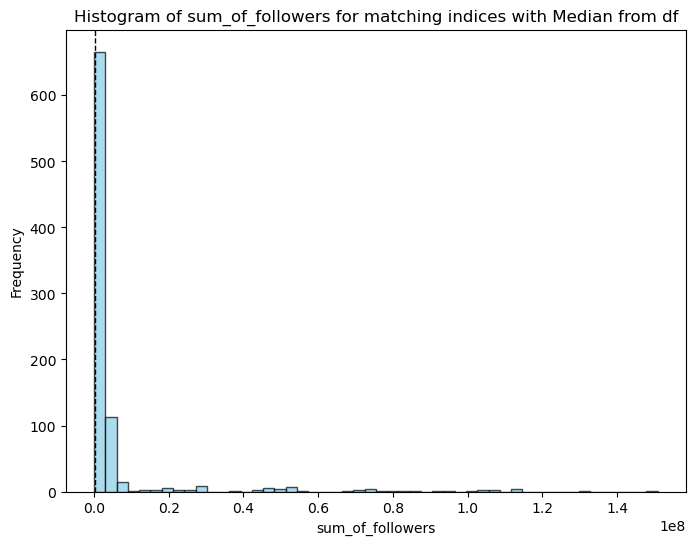

In [314]:
# Plotting histograms for each feature
for column in df2.columns:

    median_df = df[column].median()
    plt.figure(figsize=(8, 6))
    
    # Filter df2 for indices in matching_indices and select only the specific column
    data = df2.loc[matching_indices, column]
    
    # Plot histogram for filtered data
    plt.hist(data, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
    
    # Plot median as a vertical line
    plt.axvline(median_df, color='black', linestyle='dashed', linewidth=1)
    
    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} for matching indices with Median from df')
    
    # Show plot
    plt.show()


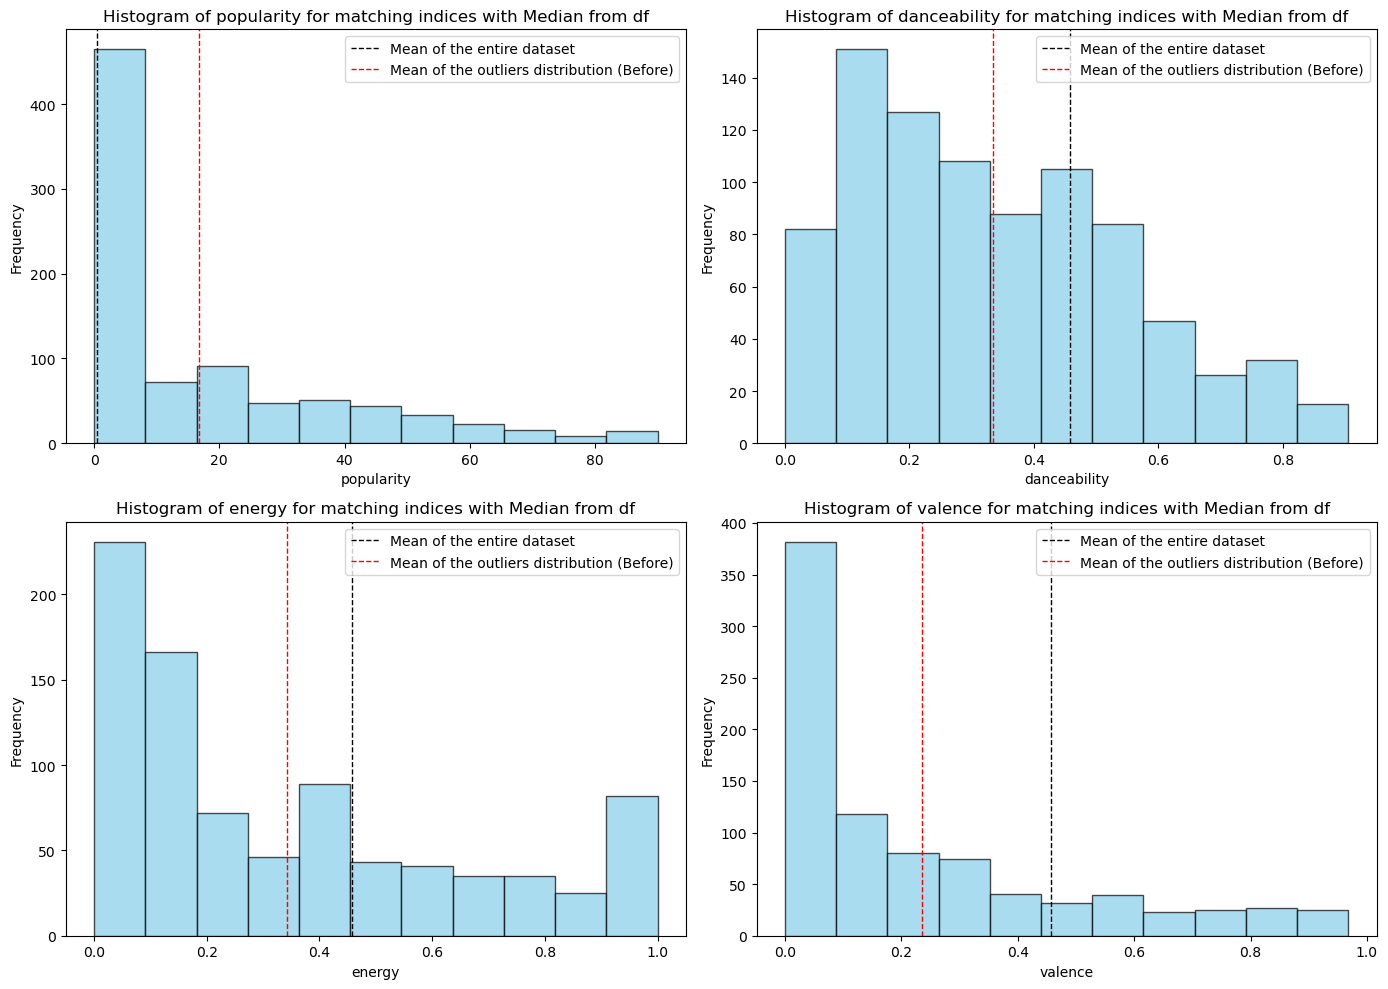

In [525]:
## Insights on features with highest discrepancy between outliers' distribution mean and entire dataset's

# Define the features to plot
features = ['popularity', 'danceability', 'energy', 'valence']

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(features):
    mean_df = df[column].mean()
     
    # Filter df_hbos for indices in matching_indices and select only the specific column
    data = matching_dataset[column]
    
    # Plot histogram for filtered data
    axes[i].hist(data, bins=11, color='skyblue', alpha=0.7, edgecolor='black')
    
    # Plot median as a vertical line
    axes[i].axvline(mean_df, color='black', linestyle='dashed', linewidth=1, label='Mean of the entire dataset')
    axes[i].axvline(matching_dataset[column].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean of the outliers distribution (Before)')
    
    # Set labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {column} for matching indices with Median from df')
    
    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [644]:
# Retrieve dataset with matching outliers
matching_dataset = df.iloc[matching_indices]


In [526]:
# Save those features' mean

mean_popularity = df['popularity'].mean()
mean_energy = df['energy'].mean()
mean_danceability = df['danceability'].mean()
mean_valence = df['valence'].mean()

In [527]:
## Find a reasonable interval to transform outliers to inliers

multiplier = 1.25

upper_bound_danceability = mean_danceability * multiplier
lower_bound_danceability = mean_danceability / multiplier

upper_bound_energy = mean_energy * multiplier
lower_bound_energy = mean_energy / multiplier

upper_bound_popularity = mean_popularity * multiplier
lower_bound_popularity = mean_popularity / multiplier

upper_bound_valence = mean_danceability * multiplier
lower_bound_valence = mean_danceability / multiplier

In [528]:
# Initialize the lists
change_popularity = []
nochange_popularity = []
change_energy = []
nochange_energy = []
change_valence = []
nochange_valence = []
change_danceability = []
nochange_danceability = []

In [532]:
# Iterate through each row in matching_dataset and check the conditions
for idx, row in matching_dataset.iterrows():
    # Check popularity
    if row['popularity'] > upper_bound_popularity or row['popularity'] < lower_bound_popularity:
        change_popularity.append(idx)
    else:
        nochange_popularity.append(idx)
    
    # Check energy
    if row['energy'] > upper_bound_energy or row['energy'] < lower_bound_energy:
        change_energy.append(idx)
    else:
        nochange_energy.append(idx)
    
    # Check valence
    if row['valence'] > upper_bound_valence or row['valence'] < lower_bound_valence:
        change_valence.append(idx)
    else:
        nochange_valence.append(idx)
    
    # Check danceability
    if row['danceability'] > upper_bound_danceability or row['danceability'] < lower_bound_danceability:
        change_danceability.append(idx)
    else:
        nochange_danceability.append(idx)

In [534]:
for idx in change_popularity:
    matching_dataset.loc[idx, 'popularity'] = mean_popularity

for idx in change_energy:
    matching_dataset.loc[idx, 'energy'] = mean_energy

for idx in change_valence:
    matching_dataset.loc[idx, 'valence'] = mean_valence

for idx in change_danceability:
    matching_dataset.loc[idx, 'danceability'] = mean_danceability

C:\Users\rugge\AppData\Local\Temp\ipykernel_19016\2942278851.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '31.473272417044587' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  matching_dataset.loc[idx, 'popularity'] = mean_popularity


In [529]:
old_mean_popularity = matching_dataset['popularity'].mean()
old_mean_energy = matching_dataset['energy'].mean()
old_mean_valence = matching_dataset['valence'].mean()
old_mean_danceability = matching_dataset['danceability'].mean()

In [535]:
new_mean_popularity = matching_dataset['popularity'].mean()
new_mean_energy = matching_dataset['energy'].mean()
new_mean_valence = matching_dataset['valence'].mean()
new_mean_danceability = matching_dataset['danceability'].mean()

In [538]:
old_means = [old_mean_popularity, old_mean_danceability, old_mean_energy, old_mean_valence]
new_means = [new_mean_popularity, new_mean_danceability, new_mean_energy, new_mean_valence]

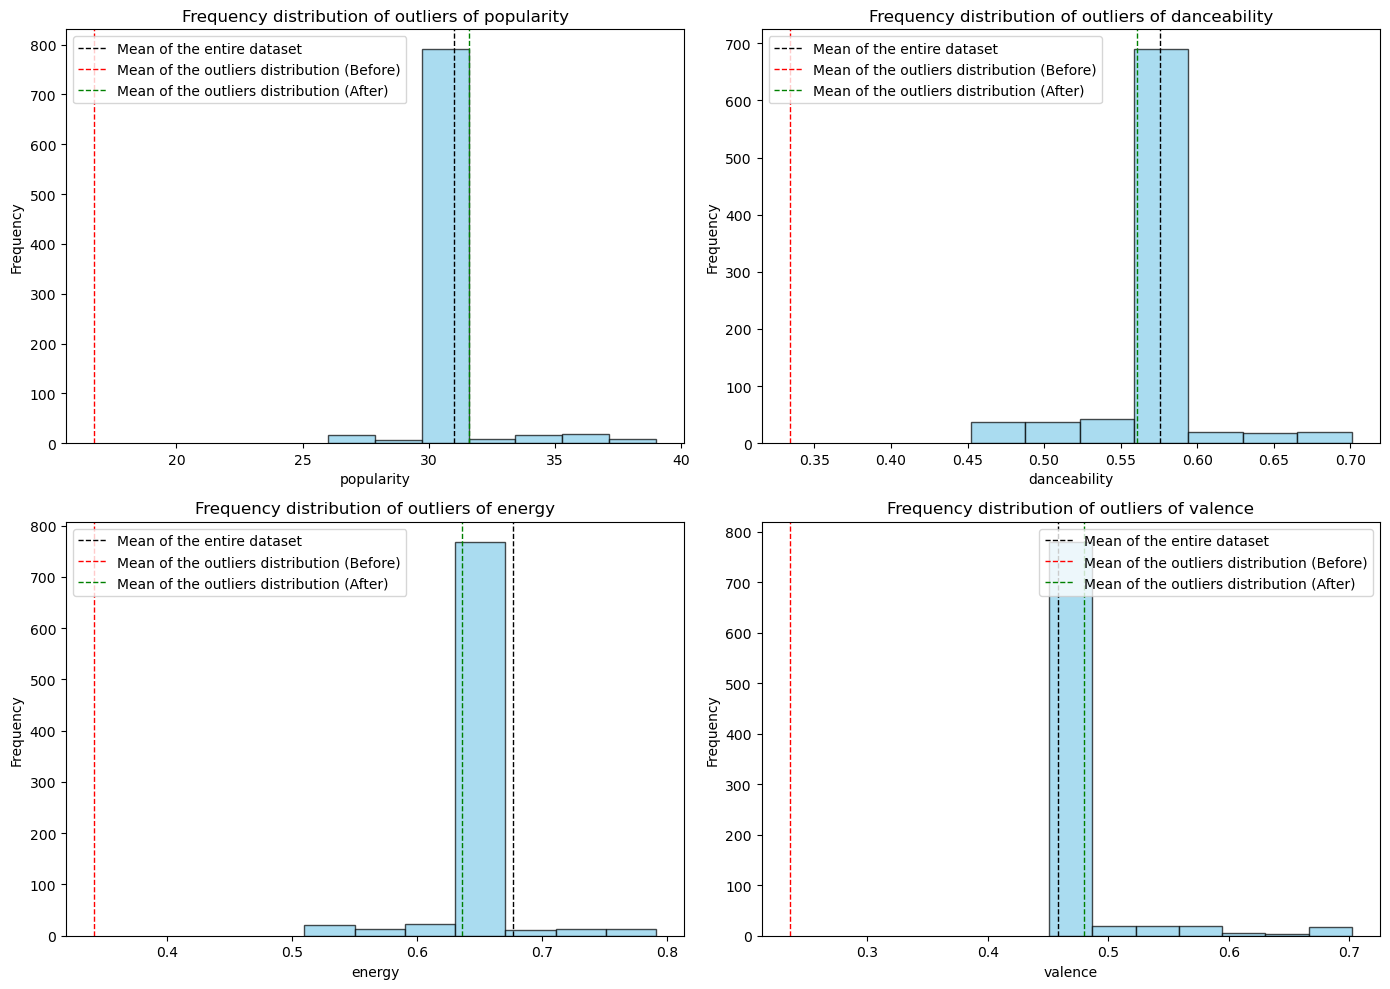

In [539]:
## Plot those features' distribution after the transformation

# Define the features to plot
features = ['popularity', 'danceability', 'energy', 'valence']

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(features):
    mean_df = df[column].median()
     
    # Filter df_hbos for indices in matching_indices and select only the specific column
    data = matching_dataset[column]
    
    # Plot histogram for filtered data
    axes[i].hist(data, bins=7, color='skyblue', alpha=0.7, edgecolor='black')
    
    # Plot median as a vertical line
    axes[i].axvline(mean_df, color='black', linestyle='dashed', linewidth=1, label='Mean of the entire dataset')
    axes[i].axvline(old_means[i], color='red', linestyle='dashed', linewidth=1, label='Mean of the outliers distribution (Before)')
    axes[i].axvline(new_means[i], color='green', linestyle='dashed', linewidth=1, label='Mean of the outliers distribution (After)')
    
    # Set labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Frequency distribution of outliers of {column}')
    
    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


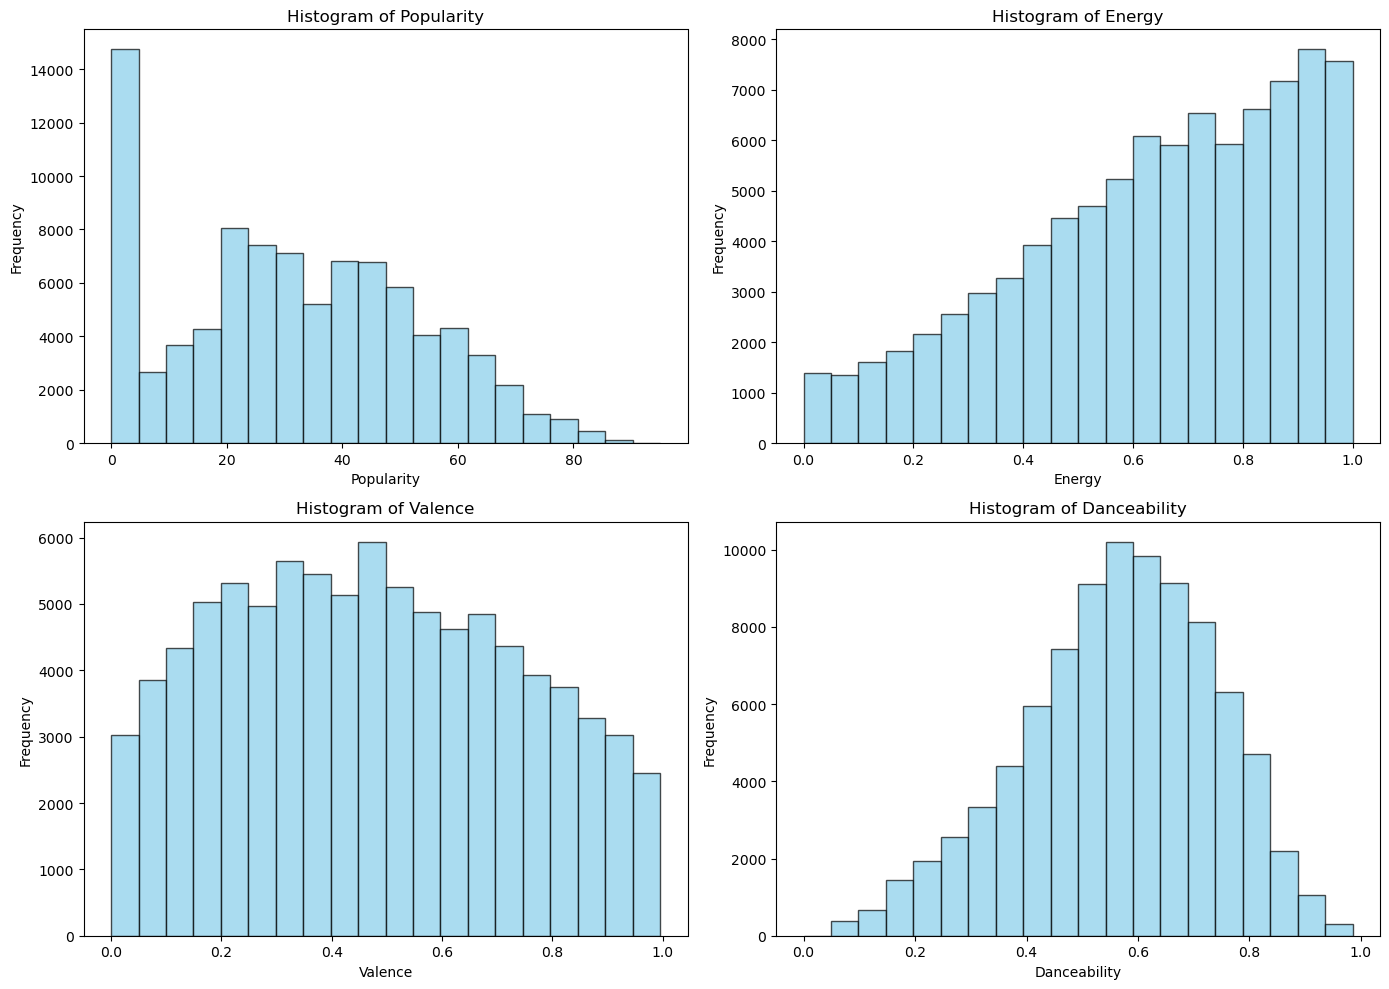

In [541]:
## New distribution of the abovementioned variables after outliers transformation

# Define the features to plot
features = ['popularity', 'energy', 'valence', 'danceability']

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
    
    # Set labels and title
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {feature.capitalize()}')

# Adjust layout
plt.tight_layout()
plt.show()


#### Running DIF multiple times until removing the outlier quota we were supposed to

In [ ]:
X_df2 = df2.values
scaler = StandardScaler()
X = scaler.fit_transform(X_df2)

In [547]:
clf = DIF(contamination = 0.01)
clf.fit(X)

DIF(batch_size=1000, contamination=0.01, device=device(type='cpu'),
  hidden_activation='tanh', hidden_neurons=[500, 100], max_samples=256,
  n_ensemble=50, n_estimators=6, random_state=None, representation_dim=20,
  skip_connection=False)

In [548]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88882,   202], dtype=int64))

In [551]:
df2['outliers_deep_isoforest2'] = outliers

In [ ]:
# Removing outliers
df2.loc[df2['outliers_deep_isoforest2'] == 1, 'outliers_deep_isoforest2'] = np.nan
df2 = df2.dropna(subset=['outliers_deep_isoforest2'])
df2.reset_index(drop=True, inplace=True)

In [553]:
df2

,duration_ms,popularity,album_total_tracks,danceability,energy,speechiness,instrumentalness,liveness,valence,time_signature,n_beats,fade_out_duration,primary_artist_popularity,average_artists_popularity,sum_of_followers,deep_isoforest_outliers,isoforest_outliers,loda_outliers,outliers_deep_isoforest2
0,290479,52.0,13,0.532,0.517,0.4930,0.535000,0.0854,0.2390,3,705.0,14574,51,51,218818,0.0,0.0,0.0,0
1,539229,45.0,8,0.750,0.340,0.0326,0.648000,0.1060,0.1450,4,1074.0,21947,47,47,231613,0.0,0.0,0.0,0
2,264200,39.0,10,0.801,0.639,0.1040,0.466000,0.0688,0.3200,3,516.0,5159,44,44,100828,0.0,0.0,0.0,0
3,387413,0.0,7,0.675,0.543,0.0639,0.719000,0.1120,0.0374,4,826.0,0,36,38,296613,0.0,0.0,0.0,0
4,248956,0.0,13,0.761,0.671,0.0418,0.917000,0.1150,0.1190,4,493.0,9321,45,45,245839,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89202,209655,23.0,2,0.466,0.982,0.0752,0.323000,0.3580,0.3700,4,585.0,9552,86,72,34880257,0.0,0.0,0.0,0
89203,205724,56.0,1,0.666,0.720,0.0269,0.000000,0.0793,0.3120,4,339.0,4738,47,47,46184,0.0,0.0,0.0,0
89204,195853,80.0,28,0.813,0.627,0.0486,0.000616,0.1310,0.8010,4,417.0,6367,86,82,30348451,0.0,0.0,0.0,0
89205,208698,60.0,1,0.653,0.779,0.0392,0.000001,0.0392,0.3870,4,359.0,11282,47,42,77107,0.0,0.0,0.0,0


In [ ]:
X_df2 = df2.values
scaler = StandardScaler()
X = scaler.fit_transform(X_df2)

In [564]:
# Another run 
clf = DIF(contamination = 0.01)
clf.fit(X)

DIF(batch_size=1000, contamination=0.01, device=device(type='cpu'),
  hidden_activation='tanh', hidden_neurons=[500, 100], max_samples=256,
  n_ensemble=50, n_estimators=6, random_state=None, representation_dim=20,
  skip_connection=False)

In [565]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)



(array([0, 1]), array([88578,   185], dtype=int64))

In [579]:
df2['outliers_deep_isoforest3'] = outliers

In [585]:
df2.loc[df2['outliers_deep_isoforest3'] == 1, 'outliers_deep_isoforest3'] = np.nan
df2 = df2.dropna(subset=['outliers_deep_isoforest3'])
df2.reset_index(drop=True, inplace=True)
# Removed

In [ ]:
X_df2 = df2.values
scaler = StandardScaler()
X = scaler.fit_transform(X_df2)

In [591]:
# Another run
clf = DIF(contamination = 0.01)
clf.fit(X)

DIF(batch_size=1000, contamination=0.01, device=device(type='cpu'),
  hidden_activation='tanh', hidden_neurons=[500, 100], max_samples=256,
  n_ensemble=50, n_estimators=6, random_state=None, representation_dim=20,
  skip_connection=False)

In [592]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88575,     3], dtype=int64))

In [ ]:
df2['outliers_deep_isoforest4'] = outliers

In [ ]:
df2.loc[df2['outliers_deep_isoforest4'] == 1, 'outliers_deep_isoforest4'] = np.nan
df2 = df2.dropna(subset=['outliers_deep_isoforest4'])
df2.reset_index(drop=True, inplace=True)
# Removed

In [ ]:
#### Last run 
X_df2 = df2.values
scaler = StandardScaler()
X = scaler.fit_transform(X_df2)

clf = DIF(contamination = 0.01)
clf.fit(X)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

In [ ]:
df2['outliers_deep_isoforest5'] = outliers

In [ ]:
df2.loc[df2['outliers_deep_isoforest5'] == 1, 'outliers_deep_isoforest5'] = np.nan
df2 = df2.dropna(subset=['outliers_deep_isoforest5'])
df2.reset_index(drop=True, inplace=True)
# Removed

In [649]:
previous_dataset = pd.read_csv(r'C:\Users\rugge\Data Mining 2\df_tracks_completed.csv')

df.describe()

# Before

,duration_ms,popularity,album_total_tracks,danceability,energy,speechiness,instrumentalness,liveness,valence,time_signature,n_beats,fade_out_duration,primary_artist_popularity,average_artists_popularity,sum_of_followers,deep_isoforest_outliers,isoforest_outliers,loda_outliers
count,8.908400e+04,89084.000000,89084.000000,89084.000000,89084.000000,89084.000000,89084.000000,89084.000000,89084.000000,89084.000000,89084.000000,89084.000000,89084.000000,89084.000000,8.908400e+04,89084.0,89084.000000,89084.000000
mean,2.285557e+05,31.617380,17.802400,0.564955,0.637932,0.087613,0.173159,0.216886,0.472414,3.902620,458.811986,7807.273248,49.364981,48.225473,3.304740e+06,0.0,0.018657,0.018769
std,1.004567e+05,21.358903,31.763923,0.172958,0.252560,0.113441,0.323588,0.194657,0.260373,0.430271,231.401970,5546.001397,17.942445,17.825751,1.137759e+07,0.0,0.135310,0.135708
min,1.580000e+04,0.000000,1.000000,0.000000,0.000020,0.000000,0.000000,0.009250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000
25%,1.730485e+05,16.000000,6.000000,0.455000,0.465000,0.036000,0.000000,0.098200,0.256000,4.000000,313.000000,4424.000000,38.000000,36.000000,3.748400e+04,0.0,0.000000,0.000000
50%,2.132865e+05,31.000000,12.000000,0.576000,0.676000,0.049000,0.000058,0.132000,0.465000,4.000000,419.000000,6942.000000,51.000000,49.000000,2.251390e+05,0.0,0.000000,0.000000
75%,2.642400e+05,48.000000,19.000000,0.692000,0.853000,0.086000,0.096200,0.279000,0.682000,4.000000,557.000000,10253.000000,62.000000,61.000000,1.361380e+06,0.0,0.000000,0.000000
max,4.120258e+06,95.000000,495.000000,0.985000,1.000000,0.965000,1.000000,1.000000,0.995000,5.000000,7348.000000,203976.000000,100.000000,100.000000,1.885570e+08,0.0,1.000000,1.000000


In [652]:
df2.describe()

# After

,duration_ms,popularity,album_total_tracks,danceability,energy,speechiness,instrumentalness,liveness,valence,time_signature,...,average_artists_popularity,sum_of_followers,deep_isoforest_outliers,isoforest_outliers,loda_outliers,outliers_deep_isoforest2,outliers_deep_isoforest3,outliers_deep_isoforestt,outliers_deep_isoforest4,outliers_deep_isoforest5
count,8.828300e+04,88283.000000,88283.000000,88283.000000,88283.000000,88283.000000,88283.000000,88283.000000,88283.000000,88283.000000,...,88283.000000,8.828300e+04,88283.0,88283.000000,88283.000000,88283.0,88283.0,88283.0,88283.0,88283.0
mean,2.281032e+05,31.753498,17.478518,0.566519,0.639653,0.086321,0.170652,0.215740,0.474143,3.912939,...,48.469014,3.328518e+06,0.0,0.013140,0.013638,0.0,0.0,0.0,0.0,0.0
std,9.598428e+04,21.352765,29.516409,0.172133,0.251436,0.108634,0.321506,0.192922,0.260123,0.396840,...,17.612982,1.141874e+07,0.0,0.113873,0.115983,0.0,0.0,0.0,0.0,0.0
min,1.745300e+04,0.000000,1.000000,0.000000,0.000020,0.000000,0.000000,0.009250,0.000000,0.000000,...,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,1.733050e+05,16.000000,6.000000,0.456000,0.468000,0.036000,0.000000,0.098100,0.258000,4.000000,...,37.000000,3.902600e+04,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,2.133060e+05,31.000000,12.000000,0.578000,0.678000,0.049000,0.000055,0.132000,0.466000,4.000000,...,49.000000,2.314400e+05,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,2.639535e+05,48.000000,19.000000,0.693000,0.854000,0.085700,0.086900,0.278000,0.684000,4.000000,...,61.000000,1.373085e+06,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,2.959346e+06,95.000000,495.000000,0.985000,1.000000,0.965000,1.000000,1.000000,0.995000,5.000000,...,100.000000,1.885570e+08,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0


In [645]:
matching_dataset

### The outliers we "transformed" to inliers were 865 

,id,name,duration_ms,explicit,popularity,artists,album_type,album_name,album_release_date,album_total_tracks,...,fade_out_duration,primary_artist_id,other_artists_id,primary_artist_popularity,other_artists_popularity,average_artists_popularity,sum_of_followers,deep_isoforest_outliers,isoforest_outliers,loda_outliers
278,1v1nsB6TCXuhdC4QNP4aB4,Vuelve,279613,0,31.473272,Daddy Yankee;Bad Bunny,compilation,Feliz Cumpleaños con Perreo,2022-10-14,52,...,6547,4VMYDCV2IEDYJArk749S6m,['4q3ewBCX7sLwd24euuV69X'],85,[94],90,106231065,0.0,1.0,1.0
305,6DCZcSspjsKoFjzjrWoCdn,God's Plan,198973,1,31.473272,Drake,album,Scorpion,2018-06-29,25,...,13597,3TVXtAsR1Inumwj472S9r4,[],94,[],94,78233981,0.0,1.0,1.0
372,4r0LAir7t2WbMTae52XOo7,Pushin P,136266,1,31.473272,Gunna;Future;Young Thug,compilation,"#Multiverse, If the Multiverse Is Real",2022-10-14,46,...,6844,2hlmm7s2ICUX0LVIhVFlZQ,"['1RyvyyTE3xzB2ZywiAwp0i', '50co4Is1HCEo8bhOyU...",84,"[88, 84]",85,28931249,0.0,1.0,1.0
375,2wkVnwWcT3DgxQU0oifynE,Pushin P,136266,1,31.473272,Gunna;Future;Young Thug,compilation,Ghetto Superstar - New Rap Classics,2022-10-14,40,...,6844,2hlmm7s2ICUX0LVIhVFlZQ,"['1RyvyyTE3xzB2ZywiAwp0i', '50co4Is1HCEo8bhOyU...",84,"[88, 84]",85,28931249,0.0,1.0,1.0
386,10l9RI8IHp1Z7b7dM3tMSv,Pushin P,136266,1,31.473272,Gunna;Future;Young Thug,compilation,Gaming Songs 2022: Hard Mode,2022-10-21,48,...,6844,2hlmm7s2ICUX0LVIhVFlZQ,"['1RyvyyTE3xzB2ZywiAwp0i', '50co4Is1HCEo8bhOyU...",84,"[88, 84]",85,28931249,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85311,0pPXrVCVqtPNxo8XUqHDKN,Over You Too,687894,0,31.473272,Omar S,album,It Can Be Done but Only I Can Do It,2017-08-02,11,...,50309,3BvWiyLcyLMoOIm2U8HepI,[],38,[],38,52183,0.0,1.0,1.0
85494,12uW7uFVE4wRt0hQetrTvl,Headcase,592986,0,31.473272,Plastikman;Richie Hawtin,album,Closer,2003-10-20,10,...,43637,7GoFQNOTX0suC6Tn59qx8n,['3AhwIUus3pIaA3CvYBEtpy'],32,[36],34,342246,0.0,1.0,1.0
85497,4vK1rDzhj0ykyqiZnq4Wjj,PK,601053,0,31.473272,Plastikman;Richie Hawtin,single,PK,2000-10-30,2,...,51646,7GoFQNOTX0suC6Tn59qx8n,['3AhwIUus3pIaA3CvYBEtpy'],32,[36],34,342246,0.0,1.0,1.0
86850,5t4Ysd832UYYBZL92258tn,Once Upon a Dream,197519,0,31.473272,Disney Peaceful Piano;Disney,album,Disney Peaceful Piano: Lullaby,2018-11-16,8,...,16224,5lmSBamD6zMcpHPqPpwmwN,['3xvaSlT4xsyk6lY1ESOspO'],64,[79],72,446831,0.0,1.0,1.0


In [648]:
# Initialize count
count = 0

# Iterate through each row in matching_dataset
for idx, row in matching_dataset.iterrows():
    # Check if both "liveness" and "speechiness" values are equal to a row in df2
    if (row["liveness"], row["speechiness"], row["duration_ms"]) in zip(df2["liveness"], df2["speechiness"], df2['duration_ms']):
        # Increment count
        count += 1

print("Aggregate count:", count)

# 621 of them "survived", our transformation was effective 

Aggregate count: 621


In [663]:
# Remove these columns, not useful anymore
df2 = df2.drop(df2[['deep_isoforest_outliers', 'isoforest_outliers', 'loda_outliers','outliers_deep_isoforest2', 'outliers_deep_isoforest3', 'outliers_deep_isoforestt', 'outliers_deep_isoforest4', 'outliers_deep_isoforest5']], axis=1)

In [669]:
df2

,duration_ms,popularity,album_total_tracks,danceability,energy,speechiness,instrumentalness,liveness,valence,time_signature,n_beats,fade_out_duration,primary_artist_popularity,average_artists_popularity,sum_of_followers
0,290479.0,52.0,13.0,0.532,0.517,0.4930,0.535000,0.0854,0.2390,3.0,705.0,14574.0,51.0,51.0,218818.0
1,539229.0,45.0,8.0,0.750,0.340,0.0326,0.648000,0.1060,0.1450,4.0,1074.0,21947.0,47.0,47.0,231613.0
2,264200.0,39.0,10.0,0.801,0.639,0.1040,0.466000,0.0688,0.3200,3.0,516.0,5159.0,44.0,44.0,100828.0
3,387413.0,0.0,7.0,0.675,0.543,0.0639,0.719000,0.1120,0.0374,4.0,826.0,0.0,36.0,38.0,296613.0
4,248956.0,0.0,13.0,0.761,0.671,0.0418,0.917000,0.1150,0.1190,4.0,493.0,9321.0,45.0,45.0,245839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88278,209655.0,23.0,2.0,0.466,0.982,0.0752,0.323000,0.3580,0.3700,4.0,585.0,9552.0,86.0,72.0,34880257.0
88279,205724.0,56.0,1.0,0.666,0.720,0.0269,0.000000,0.0793,0.3120,4.0,339.0,4738.0,47.0,47.0,46184.0
88280,195853.0,80.0,28.0,0.813,0.627,0.0486,0.000616,0.1310,0.8010,4.0,417.0,6367.0,86.0,82.0,30348451.0
88281,208698.0,60.0,1.0,0.653,0.779,0.0392,0.000001,0.0392,0.3870,4.0,359.0,11282.0,47.0,42.0,77107.0


In [675]:
# Merge df and df2 on common features of df2
merged_df = df2.merge(df, how='inner', on=df2.columns.tolist())

# Concatenate the unmatched rows from df2 with the matched rows from df
df2_with_df_features = pd.concat([df2[~df2.index.isin(merged_df.index)], merged_df], axis=0)

# Reset index
df2_with_df_features.reset_index(drop=True, inplace=True)


In [724]:
file_path = 'bottomup_no_outliers.csv'

df2_with_df_features.to_csv(file_path, index=False)

##### Top-down approach: it just consisted on running IF, LODA and DIF at contamination 0.1; the detected outlier were 8921, 8921 and 718. The matching ones among all three were 677, we removed these in a df and created the csv 'topdown_no_outliers.csv' 

### Merging "bottom-up" and "top-down" approach

In [18]:
df_bottomup = pd.read_csv(r"bottomup_no_outliers.csv")

In [19]:
df_topdown = pd.read_csv(r"topdown_no_outliers.csv")

In [20]:
# Check for matching IDs
matching_ids = pd.merge(df_bottomup[['id']], df_topdown[['id']], on='id', how='inner')

# Count the number of matching IDs
num_matching_ids = len(matching_ids)

print("Number of matching IDs:", num_matching_ids)

Number of matching IDs: 88000


In [25]:
df_bottomup

,duration_ms,popularity,album_total_tracks,danceability,energy,speechiness,instrumentalness,liveness,valence,time_signature,...,name,explicit,artists,album_type,album_name,album_release_date,genre,primary_artist_id,other_artists_id,other_artists_popularity
0,290479.0,52.0,13.0,0.532,0.517,0.4930,0.535000,0.0854,0.2390,3.0,...,Grey,0.0,Kölsch,album,1989,2017-09-22,minimal-techno,2D9Oe8R9UhbMvFAsMJpXj0,[],[]
1,539229.0,45.0,8.0,0.750,0.340,0.0326,0.648000,0.1060,0.1450,4.0,...,Thrown,0.0,Kiasmos,album,Kiasmos,2014-10-27,minimal-techno,6X8lhZ7YaRUBlOsOYimlyD,[],[]
2,264200.0,39.0,10.0,0.801,0.639,0.1040,0.466000,0.0688,0.3200,3.0,...,Routine,0.0,Joris Delacroix,album,Night Visions,2018-06-22,minimal-techno,3HRRzIZNQFus3xlUx2xKy1,[],[]
3,387413.0,0.0,7.0,0.675,0.543,0.0639,0.719000,0.1120,0.0374,4.0,...,Confronted - Anfisa Letyago Stranger Remix,0.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,minimal-techno,6OQOvP7RAdmAKVXXQqD0Se,['7icoOm5fKKPo49jVxoj1Cq'],[40]
4,248956.0,0.0,13.0,0.761,0.671,0.0418,0.917000,0.1150,0.1190,4.0,...,Jupiter Sunrise,0.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,minimal-techno,1oXiuCd5F0DcnmXH5KaM6N,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88279,209655.0,23.0,2.0,0.466,0.982,0.0752,0.323000,0.3580,0.3700,4.0,...,I'm Good (Blue) - REAPER Extended Remix,1.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,edm,1Cs0zKBU1kc0i8ypK3B9ai,"['64M6ah0SkkRsnPGtGiRAbb', '24kY0bUku58QhWv5WF...","[79, 50]"
88280,205724.0,56.0,1.0,0.666,0.720,0.0269,0.000000,0.0793,0.3120,4.0,...,End Of The Night,1.0,Danny Avila,single,End Of The Night,2018-11-16,edm,5y3G1B8cpCTaoq0uDgjwzH,[],[]
88281,195853.0,80.0,28.0,0.813,0.627,0.0486,0.000616,0.1310,0.8010,4.0,...,Sexy Bitch (feat. Akon),1.0,David Guetta;Akon,album,One More Love,2010-11-22,edm,1Cs0zKBU1kc0i8ypK3B9ai,['0z4gvV4rjIZ9wHck67ucSV'],[79]
88282,208698.0,60.0,1.0,0.653,0.779,0.0392,0.000001,0.0392,0.3870,4.0,...,Savannah,0.0,Diviners;Philly K.,single,Savannah,2015-11-25,edm,22lnnGKlaDxk8sfzCNRJuA,['1v8lhkt5jZgHT8xi1wYNUS'],[38]


In [26]:
df_topdown

,id,name,duration_ms,explicit,popularity,artists,album_type,album_name,album_release_date,album_total_tracks,...,time_signature,n_beats,genre,fade_out_duration,primary_artist_id,other_artists_id,primary_artist_popularity,other_artists_popularity,average_artists_popularity,sum_of_followers
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,290479,0,52,Kölsch,album,1989,2017-09-22,13,...,3,705.0,minimal-techno,14574,2D9Oe8R9UhbMvFAsMJpXj0,[],51,[],51,218818
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,539229,0,45,Kiasmos,album,Kiasmos,2014-10-27,8,...,4,1074.0,minimal-techno,21947,6X8lhZ7YaRUBlOsOYimlyD,[],47,[],47,231613
2,56tXgHlSHCfgmGhwVXNizc,Routine,264200,0,39,Joris Delacroix,album,Night Visions,2018-06-22,10,...,3,516.0,minimal-techno,5159,3HRRzIZNQFus3xlUx2xKy1,[],44,[],44,100828
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,387413,0,0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,7,...,4,826.0,minimal-techno,0,6OQOvP7RAdmAKVXXQqD0Se,['7icoOm5fKKPo49jVxoj1Cq'],36,[40],38,296613
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,248956,0,0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,13,...,4,493.0,minimal-techno,9321,1oXiuCd5F0DcnmXH5KaM6N,[],45,[],45,245839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88525,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,209655,1,23,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,2,...,4,585.0,edm,9552,1Cs0zKBU1kc0i8ypK3B9ai,"['64M6ah0SkkRsnPGtGiRAbb', '24kY0bUku58QhWv5WF...",86,"[79, 50]",72,34880257
88526,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,205724,1,56,Danny Avila,single,End Of The Night,2018-11-16,1,...,4,339.0,edm,4738,5y3G1B8cpCTaoq0uDgjwzH,[],47,[],47,46184
88527,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),195853,1,80,David Guetta;Akon,album,One More Love,2010-11-22,28,...,4,417.0,edm,6367,1Cs0zKBU1kc0i8ypK3B9ai,['0z4gvV4rjIZ9wHck67ucSV'],86,[79],82,30348451
88528,0ZdUHFxifUJNqo7G4aJzoF,Savannah,208698,0,60,Diviners;Philly K.,single,Savannah,2015-11-25,1,...,4,359.0,edm,11282,22lnnGKlaDxk8sfzCNRJuA,['1v8lhkt5jZgHT8xi1wYNUS'],47,[38],42,77107


In [27]:
## Among the 88284 and 88530 records in the two approach, the matching records were exactly 88000: that is our final outlier-free dataset.

# Initially retrieve all the records in the two dfs 
df_total = pd.concat([df_bottomup, df_topdown], ignore_index=True)

# Remove duplicate IDs, keeping the first occurrence
df_total = df_total.drop_duplicates(subset='id', keep='first')

# Reset index
df_total.reset_index(drop=True, inplace=True)

# Print the shape of df_total
print("Shape of df_total:", df_total.shape)


Shape of df_total: (88814, 26)


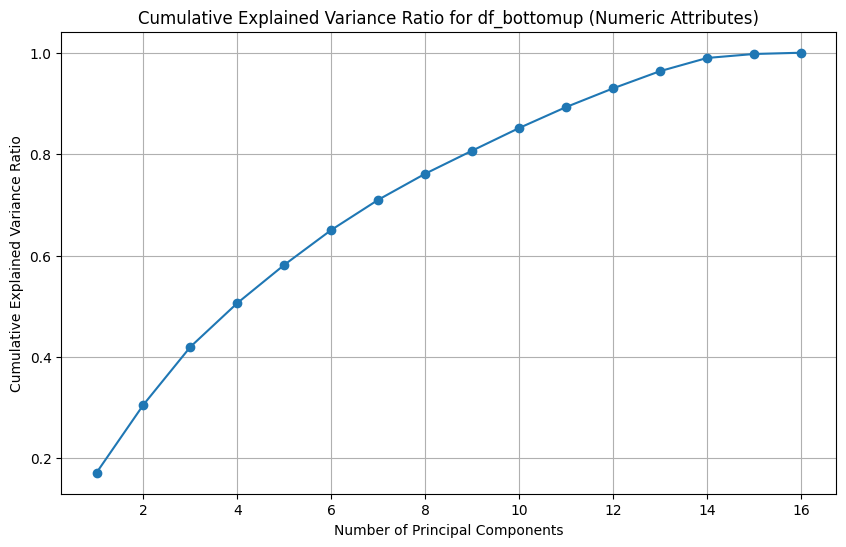

In [28]:
# Perform PCA to visualize it 

# Select numeric columns
numeric_columns = df_total.select_dtypes(include=['int', 'float'])

# Standardize the numeric columns
scaler = StandardScaler()
numeric_columns_scaled = scaler.fit_transform(numeric_columns)

# Perform PCA
pca = PCA()
pca.fit(numeric_columns_scaled)

# Calculate cumulative explained variance ratio
cumulative_explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio for df_bottomup (Numeric Attributes)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


In [31]:
# Select numeric columns
numeric_columns = df_total.select_dtypes(include=['int', 'float'])

# Standardize the numeric columns
scaler = StandardScaler()
numeric_columns_scaled = scaler.fit_transform(numeric_columns)

# Perform PCA
pca = PCA()
pca.fit(numeric_columns_scaled)

# Transform data using PCA
transformed_data = pca.transform(numeric_columns_scaled)

# Create dataframe with PCA-transformed values
pca_df = pd.DataFrame(transformed_data, columns=[f'PC{i}' for i in range(1, transformed_data.shape[1] + 1)])

# Add IDs to pca_df
pca_df['id'] = df_total['id']

# Assign labels "inliers" to rows with matching IDs and "last outliers" to the remaining rows
pca_df['label'] = 'last outliers'

# Set label as "inliers" for rows with matching IDs
pca_df.loc[pca_df['id'].isin(matching_ids['id']), 'label'] = 'inliers'

# Print the shape of pca_df
print("Shape of pca_df:", pca_df.shape)

# Display pca_df
print(pca_df)


Shape of pca_df: (88814, 18)
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.010930  1.038219  0.179211  1.768049 -1.243834  1.647062 -2.098297   
1     -2.229099  4.355191  0.794318 -0.993454 -0.729025  1.377119 -0.100140   
2     -0.676421  0.164306 -0.213342 -0.260943 -0.564004  0.279491 -1.863007   
3     -2.426644  1.031537  0.579242  0.006987  0.523403  0.699860  0.750559   
4     -1.622100  0.353550 -0.470436 -0.641867  0.145056  0.959569  0.984213   
...         ...       ...       ...       ...       ...       ...       ...   
88809 -4.456289  1.841493  1.926596 -1.230789  0.186405  1.448167 -0.074629   
88810 -1.846276 -1.673753 -4.831084  1.905264 -0.411041 -0.221704 -5.290053   
88811 -2.461700 -0.340573 -4.841882  2.467353  0.365833  0.359936 -5.288544   
88812 -2.273225 -1.288404 -3.768191  0.500862 -0.599807  0.802794 -5.754943   
88813 -3.126362  0.309542 -1.717370  1.560415  0.193197 -0.349195 -1.553174   

            PC8       

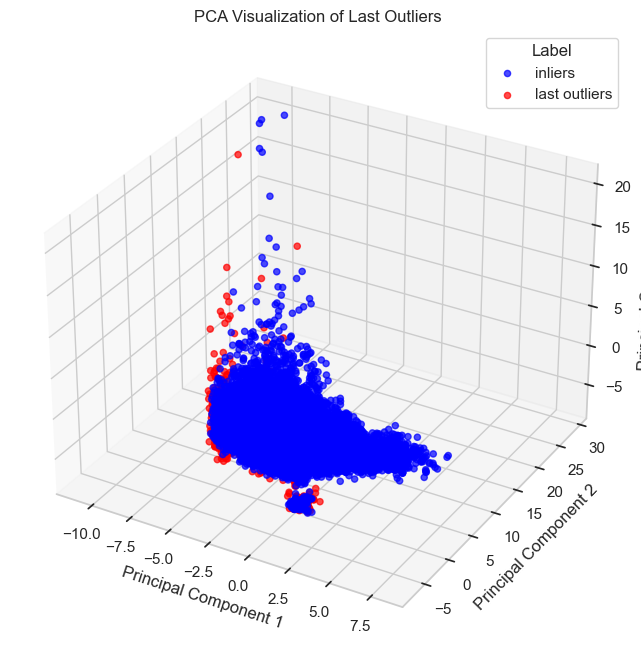

In [32]:
# Outliers vs Inliers Plot

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot PCA components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors and labels
for label, color in zip(['inliers', 'last outliers'], ['blue', 'red']):
    subset = pca_df[pca_df['label'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], c=color, label=label, alpha=0.7)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Visualization of Last Outliers')

# Add legend
ax.legend(title='Label', loc='best')

# Show plot
plt.show()

In [33]:
count_labels = pca_df['label'].value_counts()

# Print the counts
print("Number of inliers:", count_labels['inliers'])
print("Number of last outliers:", count_labels['last outliers'])

Number of inliers: 88000
Number of last outliers: 814


In [34]:
# Merge df_total with pca_df to bring the labels into df_total
df_total_merged = df_total.merge(pca_df[['id', 'label']], on='id')

# Filter out rows labeled as "last outliers"
df_total_filtered = df_total_merged[df_total_merged['label'] != 'last outliers']

# Drop the 'label' column as it's no longer needed
df_total_filtered.drop(columns='label', inplace=True)

# Reset the index of the filtered dataframe
df_total_filtered.reset_index(drop=True, inplace=True)

# Print the shape of the filtered dataframe
print("Shape of df_total_filtered:", df_total_filtered.shape)

# Display the filtered dataframe
print(df_total_filtered)


Shape of df_total_filtered: (88000, 26)
       duration_ms  popularity  album_total_tracks  danceability  energy  \
0         290479.0        52.0                13.0         0.532   0.517   
1         539229.0        45.0                 8.0         0.750   0.340   
2         264200.0        39.0                10.0         0.801   0.639   
3         387413.0         0.0                 7.0         0.675   0.543   
4         248956.0         0.0                13.0         0.761   0.671   
...            ...         ...                 ...           ...     ...   
87995     209655.0        23.0                 2.0         0.466   0.982   
87996     205724.0        56.0                 1.0         0.666   0.720   
87997     195853.0        80.0                28.0         0.813   0.627   
87998     208698.0        60.0                 1.0         0.653   0.779   
87999     202826.0        57.0                 8.0         0.768   0.444   

       speechiness  instrumentalness  liveness 

C:\Users\rugge\AppData\Local\Temp\ipykernel_6652\2757422873.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_filtered.drop(columns='label', inplace=True)


In [35]:
# path = 'final_clean_dataset.csv'
# df_total_filtered.to_csv(path, index=False)

## Saving up the final clean version of the dataset for further analysis 